In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None) # Setting this to none so all columns are displayed

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r"C:\Users\harma\Downloads\startup_data.csv")
start_up = df

In [3]:
# Checks if we have columns with null values and splits them into those having categorical values and numeric values

def check_for_null_values(df):
    total_columns_with_null_values = dict(df.isnull().sum()[df.isnull().sum() > 0])
    if len(total_columns_with_null_values) > 0:
#         list_of_columns_with_null_values = list(dict(df.isnull().sum()[df.isnull().sum() > 0]))
        categorical_columns_with_null_values = {i : df[i].isnull().sum() for i in list(df.select_dtypes('object'))}
        numeric_columns_with_null_values = {i : df[i].isnull().sum() for i in list(df.select_dtypes(np.number))}
        print("The categorical null values are: \n\n{}\n\nThe numeric null values are: \n\n{}\n\n".format(categorical_columns_with_null_values, numeric_columns_with_null_values))
    else:
        print("The dataset has no null values")

check_for_null_values(df)

The dataset has no null values


In [4]:
# Used for converting the categorical variable (State) into numeric form so that we can feed it to the model

label_encoder = LabelEncoder()

def Encoding(df):
    columns_with_categorical_values = list(df.select_dtypes('object'))
    for column in columns_with_categorical_values:
        df[column] = label_encoder.fit_transform(df[column])
    display(df)

Encoding(df)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [5]:
# Splitting the dataset into training and testing data (using Random Sampling)

def Sampling(df, target_variable):
    global Train, Test, Train_X, Test_X, Train_Y, Test_Y
    Train, Test = train_test_split(df, test_size = 0.2, random_state = None)
    Train_X = Train.drop(columns = [target_variable])
    Train_Y = Train[target_variable].reset_index(drop = True)
    Test_X = Test.drop(columns = [target_variable])
    Test_Y = Test[target_variable].reset_index(drop = True)
    
    print ("The shapes of sampled datasets are (after standard sampling ratio = 0.2 test size ) : \n")
    print ("Train Data = {}\n\nTest Data = {}\n\nTrain_X Data = {}\n\nTrain_Y Data = {}\n\nTest_X Data = {}\n\nTest_Y Data = {}".format(Train.shape , Test.shape , Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape))

Sampling(df,'Profit')

The shapes of sampled datasets are (after standard sampling ratio = 0.2 test size ) : 

Train Data = (40, 5)

Test Data = (10, 5)

Train_X Data = (40, 4)

Train_Y Data = (40,)

Test_X Data = (10, 4)

Test_Y Data = (10,)


In [6]:
parameters = {'fit_intercept' : [True, False], 'copy_X' : [True, False]}

linear_regressor = LinearRegression()

grid_search = GridSearchCV(linear_regressor, parameters)
grid_search.fit(Train_X, Train_Y)

print('Best hyperparameters: ', grid_search.best_params_)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True}


<Axes: xlabel='R&D Spend', ylabel='Count'>

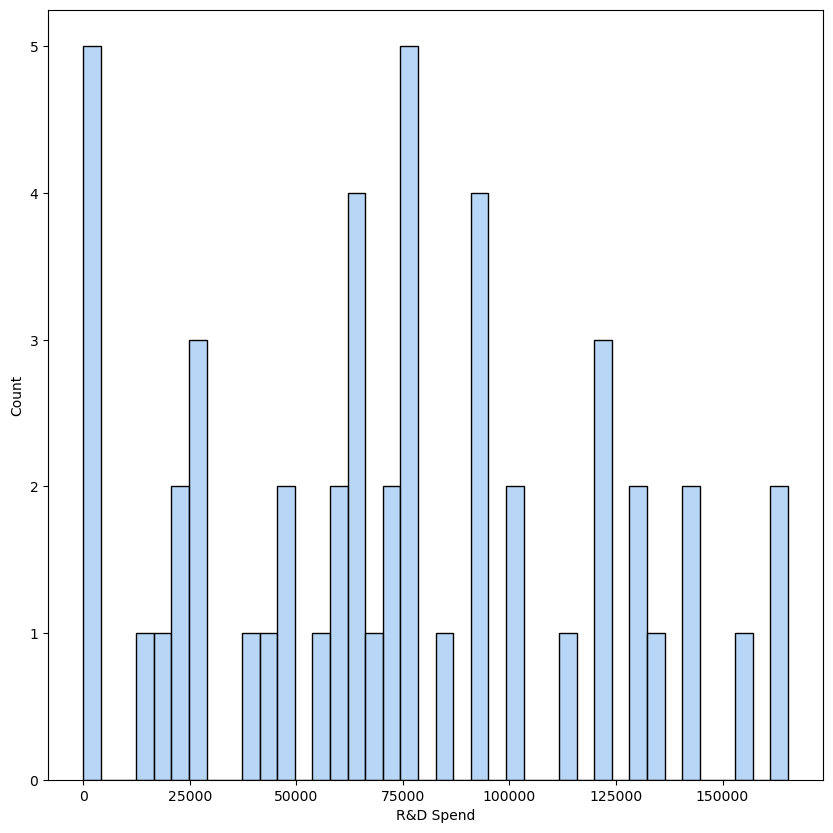

<Axes: xlabel='Administration', ylabel='Count'>

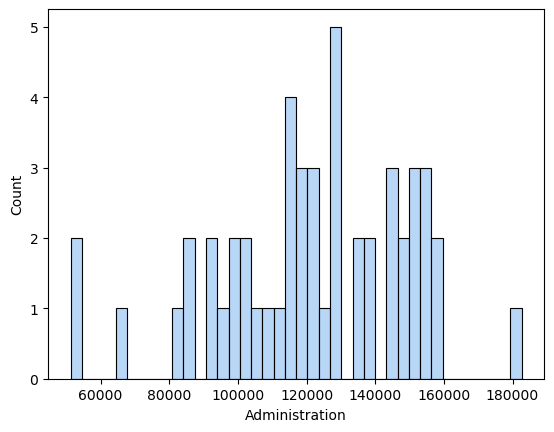

<Axes: xlabel='Marketing Spend', ylabel='Count'>

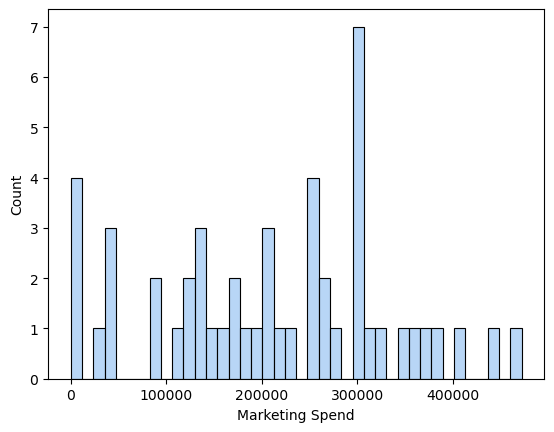

<Axes: xlabel='State', ylabel='Count'>

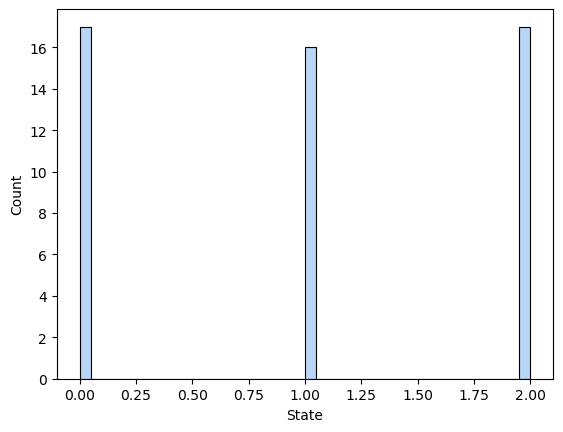

<Axes: xlabel='Profit', ylabel='Count'>

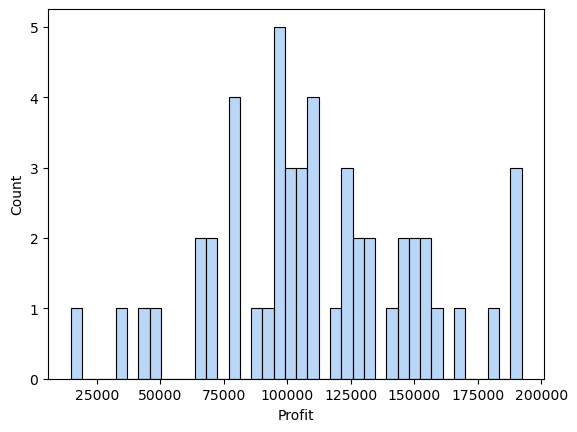

In [7]:
def Plots(df):
    sns.set_palette("pastel")
    plt.figure(figsize = (10, 10))
    for i in list(df.select_dtypes(np.number).columns):
        display(sns.histplot(x = i, data = df, bins = 40))
        plt.show()
        print(" ")
        
Plots(start_up)

In [8]:
def Statistics(df):
    for i in list(df.select_dtypes(np.number).columns):
        global mean, median, standard_deviation, kurtosis
        mean = np.mean(df[i])
        median = np.median(df[i])
        standard_deviation = np.std(df[i])
        kurtosis = df[i].kurt() + 3
        
        print('\n\nColumn -=-=-=-=> ', i)
        print('\n\nMean = {}\n\nMedian = {}\n\nStandard Deviation = {}\n\nKurtosis = {}'.format(mean, median, standard_deviation, kurtosis))
        
        if mean != median:
            if mean > median:
                print('\nRight Skewed')
            else:
                print('\nLeft Skewed')
                
        if kurtosis > 3:
            print('\nThe distribution is Leptokurtic')
        else:
            print('\nThe distribution is Platykurtic\n')
        print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

Statistics(start_up)
            



Column -=-=-=-=>  R&D Spend


Mean = 73721.6156

Median = 73051.08

Standard Deviation = 45440.915562565344

Kurtosis = 2.2385354431575326

Right Skewed

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Administration


Mean = 121344.63960000001

Median = 122699.795

Standard Deviation = 27736.20965129446

Kurtosis = 3.225071135368654

Left Skewed

The distribution is Leptokurtic
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Marketing Spend


Mean = 211025.09780000002

Median = 212716.24

Standard Deviation = 121061.23118271727

Kurtosis = 2.3282988718702486

Left Skewed

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  State


Mean = 1.0

Median = 1.0

Standard Deviation = 0.8246211251235321

Kurtosis = 1.4361702127659575

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Profit


Mean = 112012.63920000002

Median = 

<Axes: >

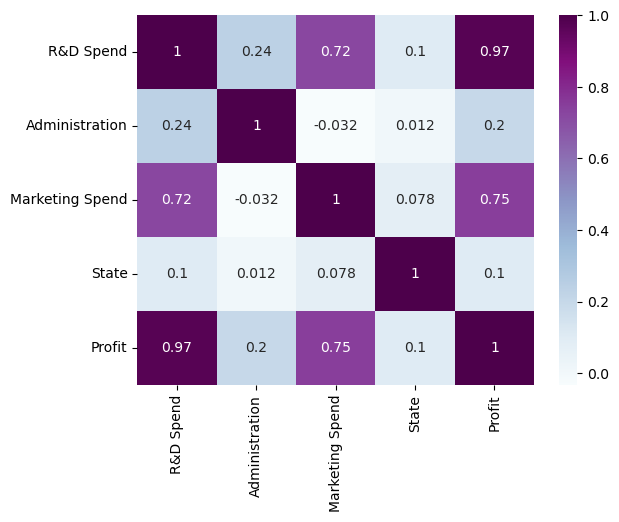

In [9]:
correlation = df.corr()
set_corr = set(correlation.values[(correlation > 0.5) | (correlation < -0.5)])
set_corr.remove(1.0)
sns.color_palette('pastel')
sns.heatmap(df.corr(), cmap = "BuPu", annot = True)

In [10]:
a = df.iloc[: , : - 1]
vif=pd.DataFrame()
vif['Variables'] = a.columns
vif['vif_values'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.sort_values('vif_values', ascending = False)

,Variables,vif_values
0,R&D Spend,8.386322
2,Marketing Spend,7.674608
1,Administration,4.815916
3,State,2.382637


In [11]:
linear_regressor = LinearRegression(copy_X = True, fit_intercept = True)
linear_regressor.fit(Train_X, Train_Y)

LinearRegression()

In [12]:
Model = pd.DataFrame()
Model['Predicted_Values'] = linear_regressor.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Pct'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Pct', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Pct
9,46584.137142,14681.40,-31902.737142,31902.737142,217.300374
7,48069.653432,35673.41,-12396.243432,12396.243432,34.749253
8,74561.574746,90708.19,16146.615254,16146.615254,17.800615
31,58665.930854,69758.98,11093.049146,11093.049146,15.901966
35,69442.403712,81229.06,11786.656288,11786.656288,14.510394
28,149690.576501,132602.65,-17087.926501,17087.926501,12.886565
3,55679.756915,49490.75,-6189.006915,6189.006915,12.505381
38,114805.346045,105008.31,-9797.036045,9797.036045,9.329772
29,88192.489053,96712.80,8520.310947,8520.310947,8.809910
10,129262.958035,141585.52,12322.561965,12322.561965,8.703264


In [13]:
coefficients = pd.DataFrame()
columns = list(df.columns)
columns.remove('Profit')
coefficients['Values'] = linear_regressor.coef_
coefficients['Columns'] = columns
coefficients

,Values,Columns
0,0.815625,R&D Spend
1,-0.036041,Administration
2,0.031452,Marketing Spend
3,56.433074,State


In [14]:
r2 = linear_regressor.score(Train_X, Train_Y)
p = Train_X.shape[1]
n = Train_X.shape[0]
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
print("The coefficient of determinant is: {} and the adjusted value is {}".format(r2 * 100, adj_r2 * 100))

The coefficient of determinant is: 94.92642054248826 and the adjusted value is 94.34658289020122


In [15]:
print("The mean of the error is: ", np.mean(Model.Error))

The mean of the error is:  2.291926648467779e-11


In [16]:
print("The mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of absolute error is:  6401.122654999273


(array([ 1.,  0.,  0.,  1.,  2.,  9., 13.,  4.,  7.,  3.]),
 array([-31902.73714163, -27097.80190202, -22292.86666241, -17487.9314228 ,
        -12682.99618319,  -7878.06094358,  -3073.12570397,   1731.80953563,
          6536.74477524,  11341.68001485,  16146.61525446]),
 <BarContainer object of 10 artists>)

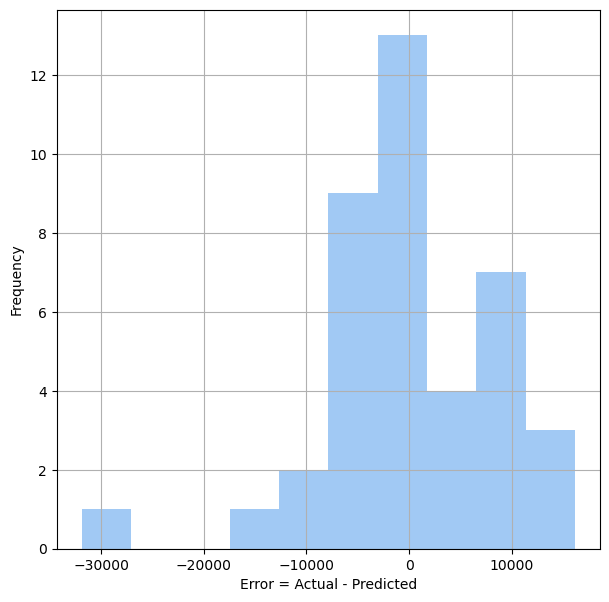

In [17]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

<Axes: xlabel='Actual_Values', ylabel='Predicted_Values'>

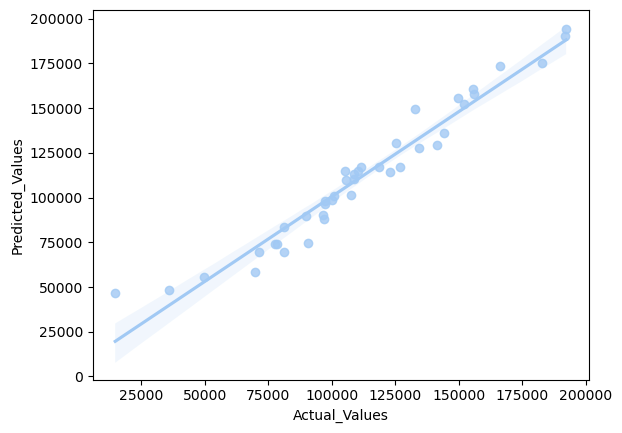

In [18]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model)

In [19]:
Predicted_Test = linear_regressor.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 
MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

The mean square value of error test is:  91165919.01684701

The mean square value of error train is:  76306712.57999799


In [20]:
RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error)))) 

The root mean square value of error test is:  9548.084573193046

root mean square value of error train is:  8735.371347572924


In [21]:
MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Pct)) 

The mean absolute percentage error (of test) is:  7.430921913087625

The mean absolute percentage error (of train) is:  11.278755855812136


In [22]:
print("Accuracy on train data is: ", 100 - MAPE  )
print('\nAccuracy on test data is: ', 100 - np.mean(Model.Error_Pct))

Accuracy on train data is:  92.56907808691237

Accuracy on test data is:  88.72124414418786


In [23]:
def Quartiles(df, y, k):
    global Lower, Upper, Lower_Outliers, Upper_Outliers
    Lower = df[y].quantile(q = 0.25)
    Upper = df[y].quantile(q = 0.75)
    IQR = Upper - Lower
    Lower_Outliers =  Lower - k * IQR 
    Upper_Outliers =  Upper + k * IQR 
    df.drop(labels = list(df [df[y] >= Upper_Outliers].index), inplace = True)
    df.drop(labels = list(df[df[y] <= Lower_Outliers].index), inplace = True)
    df.reset_index(drop = True, inplace = True)
Quartiles(df, 'Profit', 0.75) ## K = 1 becasue the data is not vast

In [24]:
linear_regressor = LinearRegression(copy_X = True, fit_intercept = True)
Train, Test = train_test_split(df, test_size = 0.2, random_state = None)
Train_X = Train.drop(columns = ['Profit'])
Train_Y = Train['Profit'].reset_index(drop = True)
Test_X = Test.drop(columns = ['Profit'])
Test_Y = Test['Profit'].reset_index(drop = True)
linear_regressor.fit(Train_X, Train_Y)
Model = pd.DataFrame()
Model['Predicted_Values'] = linear_regressor.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Pct'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Pct', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Pct
10,80062.958556,71498.49,-8564.468556,8564.468556,11.978531
16,80227.244339,90708.19,10480.945661,10480.945661,11.554575
31,127338.441393,141585.52,14247.078607,14247.078607,10.062525
21,58411.688541,64926.08,6514.391459,6514.391459,10.033551
1,98405.874776,89949.14,-8456.734776,8456.734776,9.401685
32,141311.335245,129917.04,-11394.295245,11394.295245,8.770439
12,105741.876889,97427.84,-8314.036889,8314.036889,8.533533
0,143901.323945,132602.65,-11298.673945,11298.673945,8.520700
26,134327.514711,146121.95,11794.435289,11794.435289,8.071638
6,117733.767453,126992.93,9259.162547,9259.162547,7.291085


In [25]:
r2 = linear_regressor.score(Train_X, Train_Y)
p = Train_X.shape[1]
n = Train_X.shape[0]
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
print("The coefficient of determinant is: {} and the adjusted value is {}".format(r2 * 100, adj_r2 * 100))

The coefficient of determinant is: 93.62578548578333 and the adjusted value is 92.7151834123238


In [26]:
print("The mean of the error is: ", np.mean(Model.Error))
print("\nThe mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of the error is:  -1.8741102945623975e-11

The mean of absolute error is:  5148.15426693528


(array([2., 4., 4., 5., 8., 2., 2., 2., 2., 2.]),
 array([-11394.29524527,  -8830.15786008,  -6266.02047489,  -3701.8830897 ,
         -1137.74570451,   1426.39168068,   3990.52906586,   6554.66645105,
          9118.80383624,  11682.94122143,  14247.07860662]),
 <BarContainer object of 10 artists>)

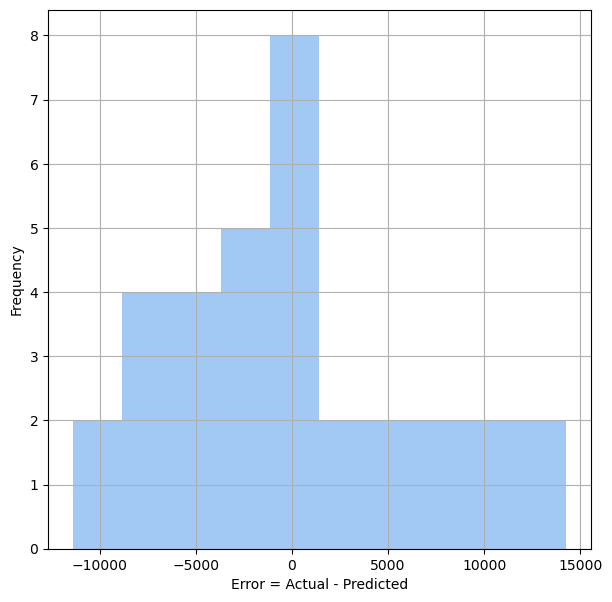

In [27]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

<Axes: xlabel='Actual_Values', ylabel='Predicted_Values'>

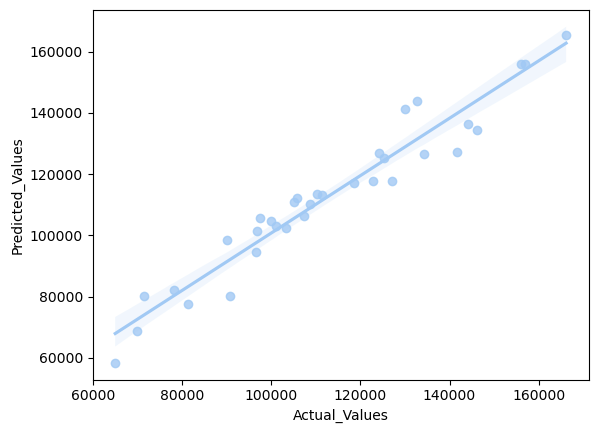

In [28]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model)

In [29]:
Predicted_Test = linear_regressor.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 

# MSE

MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

# RMSE

RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error))))

# MAPE

MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Pct)) 

# Accuracy

print("Accuracy on train data is: ", 100 - MAPE  )
print('\nAccuracy on test data is: ', 100 - np.mean(Model.Error_Pct))

The mean square value of error test is:  42585100.96412185

The mean square value of error train is:  42008456.90287308
The root mean square value of error test is:  6525.726087120256

root mean square value of error train is:  6481.39312978877
The mean absolute percentage error (of test) is:  6.220643984772076

The mean absolute percentage error (of train) is:  4.79289734860898
Accuracy on train data is:  93.77935601522792

Accuracy on test data is:  95.20710265139103


In [30]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(Train_X, Train_Y)
print('The lasso score is: ', L.score(Train_X, Train_Y) * 100)

The lasso score is:  93.62578523783537


In [31]:
Model = pd.DataFrame ( )
Model['Predicted_Values'] = L.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Percentage'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Percentage', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Percentage
10,80061.304176,71498.49,-8562.814176,8562.814176,11.976217
16,80226.848264,90708.19,10481.341736,10481.341736,11.555011
31,127338.385275,141585.52,14247.134725,14247.134725,10.062565
21,58413.147970,64926.08,6512.932030,6512.932030,10.031303
1,98404.713087,89949.14,-8455.573087,8455.573087,9.400393
32,141313.075430,129917.04,-11396.035430,11396.035430,8.771779
12,105740.350046,97427.84,-8312.510046,8312.510046,8.531966
0,143901.136729,132602.65,-11298.486729,11298.486729,8.520559
26,134327.718698,146121.95,11794.231302,11794.231302,8.071499
6,117732.001379,126992.93,9260.928621,9260.928621,7.292476


In [32]:
print("The mean of the error is: ", np.mean(Model.Error))
print("\nThe mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of the error is:  -4.4096712813232885e-13

The mean of absolute error is:  5148.156787671558


(array([2., 4., 4., 5., 8., 2., 2., 2., 2., 2.]),
 array([-11396.03542955,  -8831.71841414,  -6267.40139873,  -3703.08438333,
         -1138.76736792,   1425.54964749,   3989.86666289,   6554.1836783 ,
          9118.50069371,  11682.81770911,  14247.13472452]),
 <BarContainer object of 10 artists>)

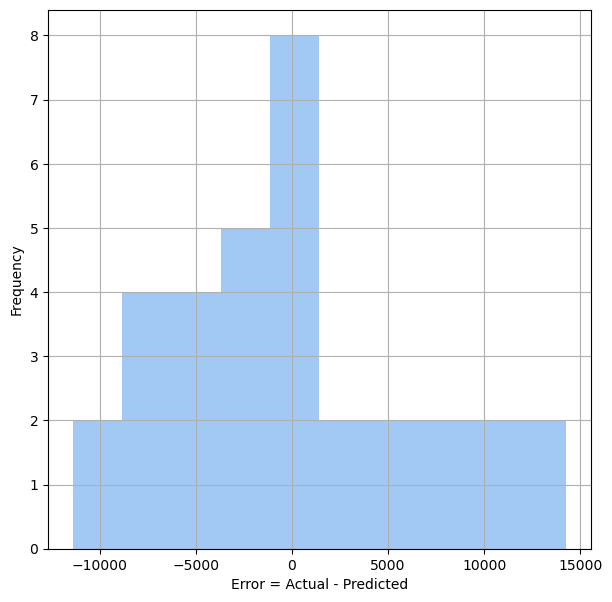

In [33]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

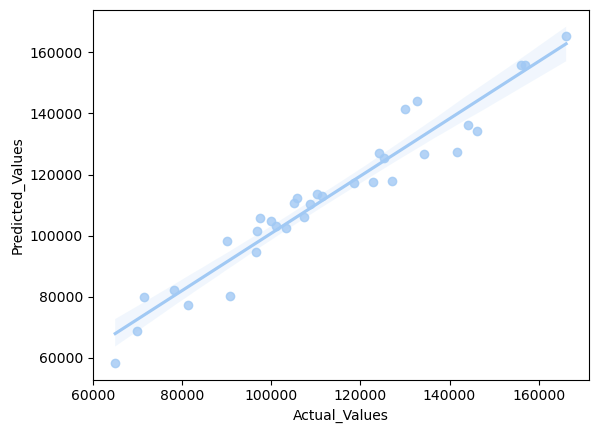

In [34]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model);

In [35]:
Predicted_Test = L.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 

# MSE

MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

# RMSE

RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error))))

# MAPE

MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Percentage)) 

# Accuracy

print("\nAccuracy on train data is: ", 100 - MAPE  )
print('Accuracy on test data is: ', 100 - np.mean(Model.Error_Percentage))

The mean square value of error test is:  42580708.507669024

The mean square value of error train is:  42008458.53694277
The root mean square value of error test is:  6525.389529190501

root mean square value of error train is:  6481.3932558472925
The mean absolute percentage error (of test) is:  6.220528628931659

The mean absolute percentage error (of train) is:  4.792750944689109

Accuracy on train data is:  93.77947137106834
Accuracy on test data is:  95.2072490553109


In [38]:
from sklearn.linear_model import Ridge
R = Ridge()
R.fit(Train_X, Train_Y)
print('The ridge score is: ', R.score(Train_X, Train_Y) * 100)

The ridge score is:  93.62543228132152


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(Train_X, Train_Y)
lr_pred_train = lr.predict(Train_X)
lr_pred_test = lr.predict(Test_X)

# Train Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(Train_X, Train_Y)
dt_pred_train = dt.predict(Train_X)
dt_pred_test = dt.predict(Test_X)

# Train Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(Train_X, Train_Y)
rf_pred_train = rf.predict(Train_X)
rf_pred_test = rf.predict(Test_X)

# Train Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(Train_X, Train_Y)
gb_pred_train = gb.predict(Train_X)
gb_pred_test = gb.predict(Test_X)

# Train Support Vector Regressor
svr = SVR()
svr.fit(Train_X, Train_Y)
svr_pred_train = svr.predict(Train_X)
svr_pred_test = svr.predict(Test_X)

# Evaluate the models
def evaluate_model(pred_train, pred_test, y_train, y_test):
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, pred_train)
    test_mae = mean_absolute_error(y_test, pred_test)
    return train_mse, test_mse, train_rmse, test_rmse, train_mae, test_mae

# Evaluation
print("Linear Regression:")
lr_metrics = evaluate_model(lr_pred_train, lr_pred_test, Train_Y, Test_Y)
print(f"Train MSE: {lr_metrics[0]}, Test MSE: {lr_metrics[1]}")
print(f"Train RMSE: {lr_metrics[2]}, Test RMSE: {lr_metrics[3]}")
print(f"Train MAE: {lr_metrics[4]}, Test MAE: {lr_metrics[5]}")

print("\nDecision Tree Regressor:")
dt_metrics = evaluate_model(dt_pred_train, dt_pred_test, Train_Y, Test_Y)
print(f"Train MSE: {dt_metrics[0]}, Test MSE: {dt_metrics[1]}")
print(f"Train RMSE: {dt_metrics[2]}, Test RMSE: {dt_metrics[3]}")
print(f"Train MAE: {dt_metrics[4]}, Test MAE: {dt_metrics[5]}")

print("\nRandom Forest Regressor:")
rf_metrics = evaluate_model(rf_pred_train, rf_pred_test, Train_Y, Test_Y)
print(f"Train MSE: {rf_metrics[0]}, Test MSE: {rf_metrics[1]}")
print(f"Train RMSE: {rf_metrics[2]}, Test RMSE: {rf_metrics[3]}")
print(f"Train MAE: {rf_metrics[4]}, Test MAE: {rf_metrics[5]}")

print("\nGradient Boosting Regressor:")
gb_metrics = evaluate_model(gb_pred_train, gb_pred_test, Train_Y, Test_Y)
print(f"Train MSE: {gb_metrics[0]}, Test MSE: {gb_metrics[1]}")
print(f"Train RMSE: {gb_metrics[2]}, Test RMSE: {gb_metrics[3]}")
print(f"Train MAE: {gb_metrics[4]}, Test MAE: {gb_metrics[5]}")

print("\nSupport Vector Regressor:")
svr_metrics = evaluate_model(svr_pred_train, svr_pred_test, Train_Y, Test_Y)
print(f"Train MSE: {svr_metrics[0]}, Test MSE: {svr_metrics[1]}")
print(f"Train RMSE: {svr_metrics[2]}, Test RMSE: {svr_metrics[3]}")
print(f"Train MAE: {svr_metrics[4]}, Test MAE: {svr_metrics[5]}")

Linear Regression:
Train MSE: 42008456.90287308, Test MSE: 42585100.96412185
Train RMSE: 6481.39312978877, Test RMSE: 6525.726087120256
Train MAE: 5148.154266935279, Test MAE: 5806.092585805805

Decision Tree Regressor:
Train MSE: 0.0, Test MSE: 197143847.90098882
Train RMSE: 0.0, Test RMSE: 14040.792281811908
Train MAE: 0.0, Test MAE: 10059.147777777775

Random Forest Regressor:
Train MSE: 8623810.371847086, Test MSE: 155697023.36407232
Train RMSE: 2936.6324883865, Test RMSE: 12477.861329734047
Train MAE: 2412.616551515177, Test MAE: 9876.341844444476

Gradient Boosting Regressor:
Train MSE: 21589.139775641514, Test MSE: 122953304.76749274
Train RMSE: 146.93243268809482, Test RMSE: 11088.43112290881
Train MAE: 113.02190893458773, Test MAE: 7499.709127661342

Support Vector Regressor:
Train MSE: 673847990.8424468, Test MSE: 1074832180.4500797
Train RMSE: 25958.58221942113, Test RMSE: 32784.63329747764
Train MAE: 20853.319168556896, Test MAE: 28568.105033613203


In [40]:
from sklearn.metrics import r2_score

# Evaluate the models for R² score
def evaluate_r2(pred_train, pred_test, y_train, y_test):
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    return train_r2, test_r2

# Linear Regression
lr_train_r2, lr_test_r2 = evaluate_r2(lr_pred_train, lr_pred_test, Train_Y, Test_Y)
print(f"Linear Regression - Train R²: {lr_train_r2}, Test R²: {lr_test_r2}")

# Decision Tree Regressor
dt_train_r2, dt_test_r2 = evaluate_r2(dt_pred_train, dt_pred_test, Train_Y, Test_Y)
print(f"Decision Tree Regressor - Train R²: {dt_train_r2}, Test R²: {dt_test_r2}")

# Random Forest Regressor
rf_train_r2, rf_test_r2 = evaluate_r2(rf_pred_train, rf_pred_test, Train_Y, Test_Y)
print(f"Random Forest Regressor - Train R²: {rf_train_r2}, Test R²: {rf_test_r2}")

# Gradient Boosting Regressor
gb_train_r2, gb_test_r2 = evaluate_r2(gb_pred_train, gb_pred_test, Train_Y, Test_Y)
print(f"Gradient Boosting Regressor - Train R²: {gb_train_r2}, Test R²: {gb_test_r2}")

# Support Vector Regressor
svr_train_r2, svr_test_r2 = evaluate_r2(svr_pred_train, svr_pred_test, Train_Y, Test_Y)
print(f"Support Vector Regressor - Train R²: {svr_train_r2}, Test R²: {svr_test_r2}")

# Compare and choose the best model based on Test R² score
model_scores = {
    'Linear Regression': lr_test_r2,
    'Decision Tree Regressor': dt_test_r2,
    'Random Forest Regressor': rf_test_r2,
    'Gradient Boosting Regressor': gb_test_r2,
    'Support Vector Regressor': svr_test_r2
}

best_model = max(model_scores, key=model_scores.get)
best_accuracy = model_scores[best_model]

print(f"\nThe best model is {best_model} with a Test R² score of {best_accuracy}.")

Linear Regression - Train R²: 0.9362578548578332, Test R²: 0.9603757102599636
Decision Tree Regressor - Train R²: 1.0, Test R²: 0.8165629581041542
Random Forest Regressor - Train R²: 0.9869145354786121, Test R²: 0.8551281122795283
Gradient Boosting Regressor - Train R²: 0.9999672414036951, Test R²: 0.8855952607296445
Support Vector Regressor - Train R²: -0.022473082868680994, Test R²: -0.00010240144671302964

The best model is Linear Regression with a Test R² score of 0.9603757102599636.


In [41]:
# Function to calculate accuracy based on MAPE
def calculate_accuracy(y_true, y_pred):
    error = y_true - y_pred
    absolute_error = np.abs(error)
    error_percentage = (absolute_error * 100) / y_true
    mape = np.mean(error_percentage)
    accuracy = 100 - mape
    return accuracy

# Calculate accuracy for each model
print("\nLinear Regression:")
lr_train_accuracy = calculate_accuracy(Train_Y, lr_pred_train)
lr_test_accuracy = calculate_accuracy(Test_Y, lr_pred_test)
print(f"Train Accuracy: {lr_train_accuracy}%")
print(f"Test Accuracy: {lr_test_accuracy}%")

print("\nDecision Tree Regressor:")
dt_train_accuracy = calculate_accuracy(Train_Y, dt_pred_train)
dt_test_accuracy = calculate_accuracy(Test_Y, dt_pred_test)
print(f"Train Accuracy: {dt_train_accuracy}%")
print(f"Test Accuracy: {dt_test_accuracy}%")

print("\nRandom Forest Regressor:")
rf_train_accuracy = calculate_accuracy(Train_Y, rf_pred_train)
rf_test_accuracy = calculate_accuracy(Test_Y, rf_pred_test)
print(f"Train Accuracy: {rf_train_accuracy}%")
print(f"Test Accuracy: {rf_test_accuracy}%")

print("\nGradient Boosting Regressor:")
gb_train_accuracy = calculate_accuracy(Train_Y, gb_pred_train)
gb_test_accuracy = calculate_accuracy(Test_Y, gb_pred_test)
print(f"Train Accuracy: {gb_train_accuracy}%")
print(f"Test Accuracy: {gb_test_accuracy}%")

print("\nSupport Vector Regressor:")
svr_train_accuracy = calculate_accuracy(Train_Y, svr_pred_train)
svr_test_accuracy = calculate_accuracy(Test_Y, svr_pred_test)
print(f"Train Accuracy: {svr_train_accuracy}%")
print(f"Test Accuracy: {svr_test_accuracy}%")

# Compare and choose the best model based on Test Accuracy
model_accuracies = {
    'Linear Regression': lr_test_accuracy,
    'Decision Tree Regressor': dt_test_accuracy,
    'Random Forest Regressor': rf_test_accuracy,
    'Gradient Boosting Regressor': gb_test_accuracy,
    'Support Vector Regressor': svr_test_accuracy
}

best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"\nThe best model is {best_model} with a Test Accuracy of {best_accuracy}%.")


Linear Regression:
Train Accuracy: 95.20710265139103%
Test Accuracy: 93.77935601522792%

Decision Tree Regressor:
Train Accuracy: 100.0%
Test Accuracy: 91.53842292576016%

Random Forest Regressor:
Train Accuracy: 97.8068501381153%
Test Accuracy: 91.24921535198824%

Gradient Boosting Regressor:
Train Accuracy: 99.89901697495749%
Test Accuracy: 93.7603285972412%

Support Vector Regressor:
Train Accuracy: 80.57865837651713%
Test Accuracy: 72.11360354720323%

The best model is Linear Regression with a Test Accuracy of 93.77935601522792%.
